In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load data

In [2]:
df = pd.read_csv('../data/dataset.csv', sep=',')
df.drop(['NAMA', 'SEMESTER'], axis=1, inplace=True)
df

,ETIKA,BERPIKIR_KRITIS,KEPEMIMPINAN,KEMAMPUAN_KOMUNIKASI,MANAJEMEN_DIRI,PENYELESAIAN_MASALAH,KERJA_SAMA_TIM,MANAJEMEN_WAKTU,TUGAS_TERLAMBAT,KEHADIRAN,ORGANISASI,KELULUSAN
0,3.0,3.2,3.6,4.8,3.6,4.4,4.4,3.0,3,97,Tidak,Lulus
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1,100,Ya,Lulus
2,3.4,3.0,4.0,4.0,3.8,3.8,4.0,3.8,0,99,Ya,Lulus
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0,80,Tidak,Lulus
4,4.2,3.8,4.6,4.0,4.2,4.8,5.0,3.6,5,75,Ya,Tidak Lulus
...,...,...,...,...,...,...,...,...,...,...,...,...
113,3.2,2.4,3.8,2.6,3.0,3.4,3.6,3.4,1,75,Ya,Lulus
114,2.2,2.6,3.8,3.6,4.2,3.8,3.6,4.4,2,90,Ya,Lulus
115,4.2,3.2,4.4,4.2,3.8,2.6,3.4,4.0,0,100,Tidak,Lulus
116,3.8,3.0,4.0,3.8,3.8,3.4,3.8,3.6,0,100,Ya,Lulus


Cek missing values

In [3]:
print("\nANALISIS MISSING VALUES")
print("\nJumlah nilai 0 pada setiap variabel data:")

cek = ["ETIKA", "BERPIKIR_KRITIS", "KEPEMIMPINAN", "KEMAMPUAN_KOMUNIKASI", "MANAJEMEN_DIRI", "PENYELESAIAN_MASALAH", "KERJA_SAMA_TIM", "MANAJEMEN_WAKTU", "KEHADIRAN", "ORGANISASI", "KELULUSAN"]
max_len = max(len(col) for col in cek)

for col in cek:
    count = (df[col] == 0).sum()
    print(f"{col:<{max_len}} : {count}")



ANALISIS MISSING VALUES

Jumlah nilai 0 pada setiap variabel data:
ETIKA                : 0
BERPIKIR_KRITIS      : 0
KEPEMIMPINAN         : 0
KEMAMPUAN_KOMUNIKASI : 0
MANAJEMEN_DIRI       : 0
PENYELESAIAN_MASALAH : 0
KERJA_SAMA_TIM       : 0
MANAJEMEN_WAKTU      : 0
KEHADIRAN            : 0
ORGANISASI           : 0
KELULUSAN            : 0


Periksa duplikasi data

In [4]:
int(df.duplicated().sum())

0

Hapus data duplikat

In [8]:
output = '../data/dataset.csv'
df_td = df.drop_duplicates()

df_td.to_csv(output, index=False)

Load dataset

In [ ]:
df = pd.read_csv('../data/dataset.csv', sep=',')
df 

Cek duplikasi pada data

In [ ]:
int(df.duplicated().sum())

Cek outliers

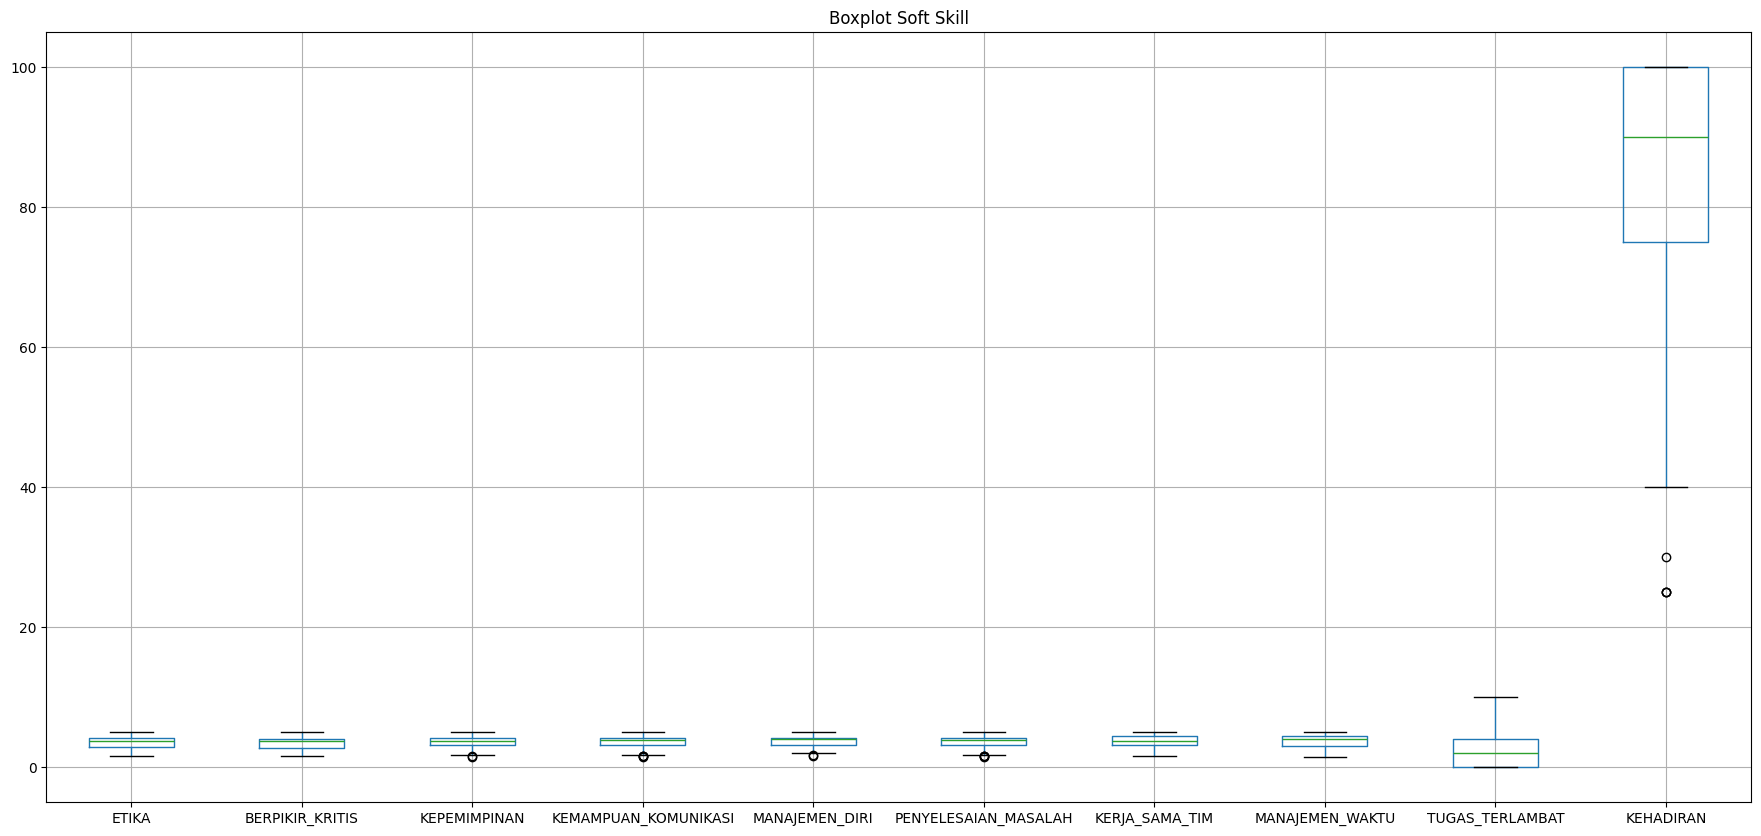

In [16]:
plt.figure(figsize=(22, 10))
df.boxplot(column=["ETIKA", "BERPIKIR_KRITIS", "KEPEMIMPINAN", "KEMAMPUAN_KOMUNIKASI", "MANAJEMEN_DIRI", "PENYELESAIAN_MASALAH", "KERJA_SAMA_TIM", "MANAJEMEN_WAKTU", "TUGAS_TERLAMBAT", "KEHADIRAN"])
plt.title('Boxplot Soft Skill')
plt.show()


In [17]:
outlier_counts = {}

columns = [
    "ETIKA", "BERPIKIR_KRITIS", "KEPEMIMPINAN", "KEMAMPUAN_KOMUNIKASI", 
    "MANAJEMEN_DIRI", "PENYELESAIAN_MASALAH", "KERJA_SAMA_TIM", 
    "MANAJEMEN_WAKTU", "TUGAS_TERLAMBAT", "KEHADIRAN"
]


for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outlier_counts[col] = count


outlier_report = pd.Series(outlier_counts)
print(outlier_report[outlier_report > 0].to_string())

if (outlier_report == 0).all():
    print("Tidak ditemukan outlier signifikan pada data.")

KEPEMIMPINAN            2
KEMAMPUAN_KOMUNIKASI    4
MANAJEMEN_DIRI          2
PENYELESAIAN_MASALAH    4
KEHADIRAN               4


#Analisis korelasi

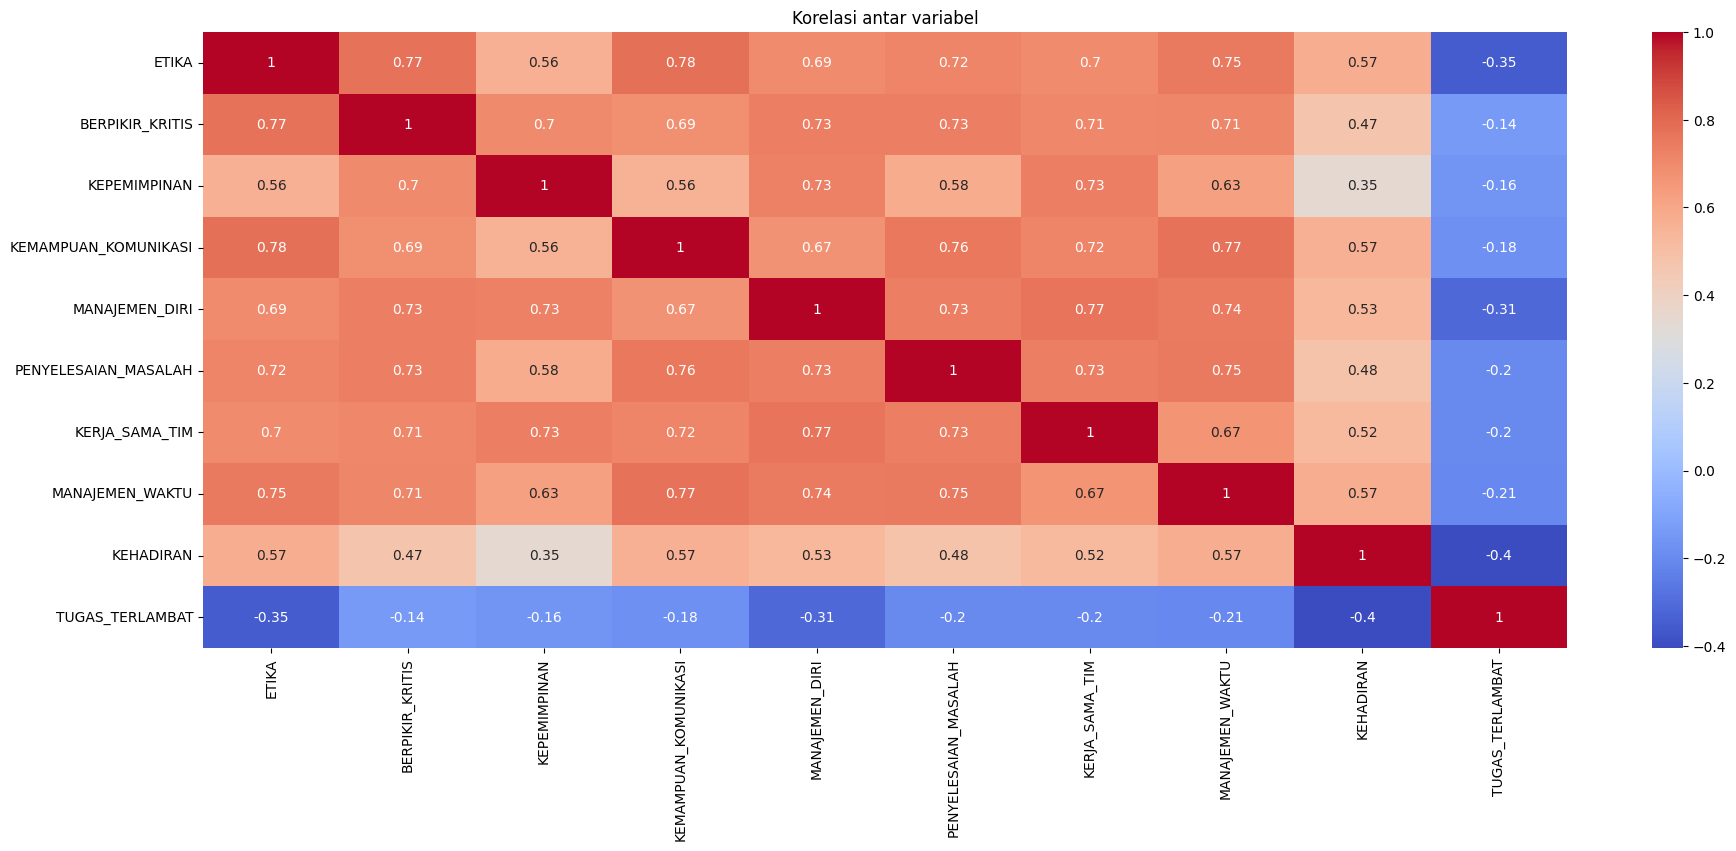

In [18]:
numeric_columns = ["ETIKA", "BERPIKIR_KRITIS", "KEPEMIMPINAN", "KEMAMPUAN_KOMUNIKASI", "MANAJEMEN_DIRI", "PENYELESAIAN_MASALAH", "KERJA_SAMA_TIM", "MANAJEMEN_WAKTU", "KEHADIRAN", "TUGAS_TERLAMBAT" ]
plt.figure(figsize=(22, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar variabel')
plt.show()

#Analisis Distribusi

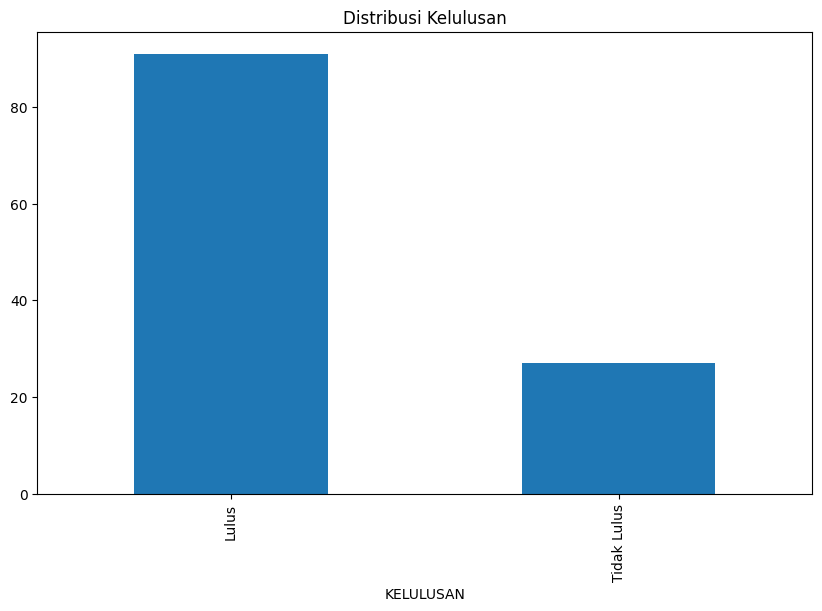

In [19]:
plt.figure(figsize=(10, 6))
df['KELULUSAN'].value_counts().plot(kind='bar')
plt.title('Distribusi Kelulusan')
plt.show()